In [1]:
import uproot, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [62]:
Etrue = []; dEdx = [];
with open('./StopPow4.txt') as f:
    for lines in f.readlines():
        line = lines.strip('\n')
        data = line.split(' ')
        Etrue.append(float(data[0]))
        dEdx.append(float(data[1]))
Etrue = np.array(Etrue)
dEdx = np.array(dEdx)

In [52]:
# birk's constants in MC:
kB1 = 6.5e-3; kB2 = 1.5e-6;

In [53]:
def funcNL(p1,p2,dEdx):
    return 1/(1+p1*dEdx+p2*dEdx**2)

def numerical_integral(a,b,Emax):
    sum = 0;
    if(len(a) != len(b)):
        print('Two array have different length!')
        return sum
    for i in range(len(a)-1):
        if(a[i+1]<=round(Emax,2)):
            area =(b[i]+b[i+1])*(a[i+1]-a[i])/2.
            sum = sum + area
            #print('area : ' + str(area) + ' edep: '+str(b[i]) + '  factor: ' +str(a[i]) )
    return sum

In [64]:
demon = funcNL(kB1, kB2, dEdx)

In [55]:

Energy = [];
for i in range(799):
    Energy.append(0.01*i+0.01)


In [65]:
Escint = [] ; ratio = [];
for i in range(len(Energy)):
    Escint.append(numerical_integral(Etrue,demon,Energy[i]))
    ratio.append(Escint[i]/Energy[i])

Text(0.5, 1.0, 'Nonlinearity by Quenching')

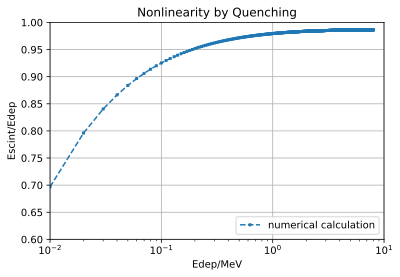

In [57]:
plt.plot(Energy, np.array(Escint)/np.array(Energy),'s--', ms=2, label='numerical calculation')
#plt.plot(Edep1, np.array(Escint1)/np.array(Edep1),'o--', ms=2, label='Geant4.10.4 default cut')
plt.xlabel('Edep/MeV')
plt.ylabel('Escint/Edep')
plt.xlim(0.01,10)
plt.ylim(0.6,1)
plt.semilogx()
plt.legend(loc='lower right')
plt.grid()
plt.title('Nonlinearity by Quenching')

In [58]:
Edep2 = []; fNonL = []
with open('../../../../Simulation/Nonlinearity/electron/Cerenkov/quench_nonL.txt') as f:
    for lines in f.readlines():
        line = lines.strip('\n')
        data = line.split(' ')
        Edep2.append(float(data[0])/1000.)
        fNonL.append(float(data[1]))

Text(0.5, 1.0, 'Nonlinearity by Quenching')

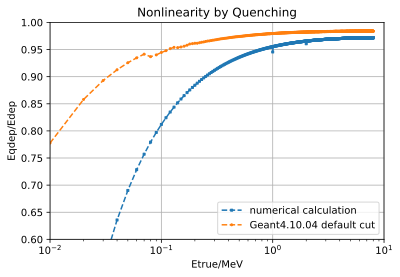

In [66]:
plt.plot(Energy, np.array(Escint)/np.array(Energy),'s--', ms=2, label='numerical calculation')
plt.plot(Edep2, fNonL,'o--', ms=2, label='Geant4.10.04 default cut')
plt.xlabel('Etrue/MeV')
plt.ylabel('Eqdep/Edep')
plt.xlim(0.01,10)
plt.ylim(0.6,1)
plt.semilogx()
plt.legend(loc='lower right')
plt.grid()
plt.title('Nonlinearity by Quenching')